## Double pendulum using Lagrange's equations

For a double pendulum, the Lagrangian with generalized coordinate $\phi_{1}$, $\phi_{2}$ is

$\begin{align} \tag{1}
  T = \frac12(m_1+m_2){L_1}^2 \dot\phi_{1}^2 + m_2 L_1 L_2 \dot\phi_{1} \dot\phi_{2} \cos(\phi_{1} - \phi_{2}) + \frac12 m_2{L_2}^2 \dot\phi_{2}^2
\end{align}$

$\begin{align} \tag{2}
  U = -[(m_1+m_2) g {L_1} \cos \phi_{1} + m_2 g {L_2} \cos \phi_{2}]
\end{align}$

Substitute $T$ and $U$ into the Lagrangian $\mathcal{L} = T-U $

\begin{equation} \tag{3}
  \begin{aligned} 
    {} &\mathcal{L} = T-U \\
    & = \frac12(m_1+m_2){L_1}^2 \dot\phi_{1}^2 + m_2 L_1 L_2 \dot\phi_{1} \dot\phi_{2} \cos(\phi_{1} - \phi_{2})
    + \frac12 m_2{L_2}^2 \dot\phi_{2}^2  + (m_1+m_2) g {L_1} \cos \phi_{1} + m_2 g {L_2} \cos \phi_{2} 
  \end{aligned}
\end{equation}

Generalized momentums are

$\begin{align} \tag{4}
   p_{\phi_{1}} = \frac{\partial\mathcal{L}}{\partial \dot\phi_{1}} = (m_1+m_2){L_1}^2 \dot\phi_{1} + m_2 L_1 L_2 \dot\phi_{2} \cos(\phi_{1} - \phi_{2})
   \;.
\end{align}$

$\begin{align} \tag{5}
   p_{\phi_{2}} = \frac{\partial\mathcal{L}}{\partial \dot\phi_{2}} = m_2{L_2}^2 \dot\phi_{2} + m_2 L_1 L_2 \dot\phi_{1} \cos(\phi_{1} - \phi_{2})
   \;.
\end{align}$

 Euler-Lagrange equations

$\begin{align} \tag{6}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_{1}} = \frac{\partial\mathcal L}{\partial\phi_{1}}
 \quad\Longrightarrow\quad
 & (m_1 + m_2) L_1^2 \ddot\phi_{1} + m_2 L_1 L_2 \ddot\phi_{2} \cos(\phi_{1} - \phi_{2}) + m_2 L_1 L_2 \dot\phi_{2}^2 \sin(\phi_{1} - \phi_{2}) \\
 & = -(m_1 + m_2) g L_1 \sin(\phi_1)
\end{align}$

$\begin{align} \tag{7}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_{2}} = \frac{\partial\mathcal L}{\partial\phi_{2}}
 \quad\Longrightarrow\quad
 & m_2 L_1^2 \ddot\phi_{2} + m_2 L_1 L_2 \ddot\phi_{2} \cos(\phi_{1} - \phi_{2}) - m_2 L_1 L_2 \dot\phi_{1}^2 \sin(\phi_{1} - \phi_{2}) \\
 & = -m_2 g L_2 \sin(\phi_2)
\end{align}$


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

## Pendulum Class

In [3]:
class DoubleLagrangianPendulum():
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g

    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt dphi2/dt d^2phi1/dt^2 d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi1(t) and y[1] = phi2(t)
                                      y[2] = dphi1/dt and y[3] = dphi2/dt
            
        Returns
        -------
        
        """
        phi1, phi1_dot, phi2, phi2_dot = y
        m1 = self.m1
        m2 = self.m2
        L1 = self.L1
        L2 = self.L2
        g = self.g
        # d^2phi1/dt^2
        p1_u = ( m2*g*np.sin(phi2)*np.cos(phi1-phi2) - m2*np.sin(phi1-phi2)*(L1*np.cos(phi1-phi2) *phi1_dot**2 + L2*phi2_dot**2) - (m1+m2)*g*np.sin(phi1)) 
        p1_l = L1*(m1+m2*np.sin(phi1-phi2)**2)
        phi1_ddot = p1_u/p1_l
        # d^2phi2/dt^2
        p2_u = ((m1+m2)*(L1*phi1_dot**2*np.sin(phi1-phi2) - g*np.sin(phi2) + g*np.sin(phi1)*np.cos(phi1-phi2)) + m2*L2*phi2_dot**2*np.cos(phi1-phi2)*np.sin(phi1-phi2))
        p2_l = L2 *(m1+m2*np.sin(phi1-phi2)**2)
        phi2_ddot = p2_u/p2_l

        return [phi1_dot, phi1_ddot, phi2_dot, phi2_ddot]

    def solve_ode(self, t_pts, phi1_0, phi2_0, phi1_dot_0, phi2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        # solution = odeint(self.dy_dt, y, t_pts, atol=abserr, rtol=relerr)
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [5]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

# Instantiate a pendulum 
L1=2.
L2=1.
m1=1.
m2=1.
g=9.8
dp1 = DoubleLagrangianPendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)

In [6]:
phi1_0 = np.pi/2
phi2_0 = np.pi
phi1_dot_0 = 0.
phi2_dot_0 = 0.

dp1 = DoubleLagrangianPendulum()
phi1, phi1_dot, phi2, phi2_dot = dp1.solve_ode(t_pts, phi1_0, phi2_0, phi1_dot_0, phi2_dot_0)


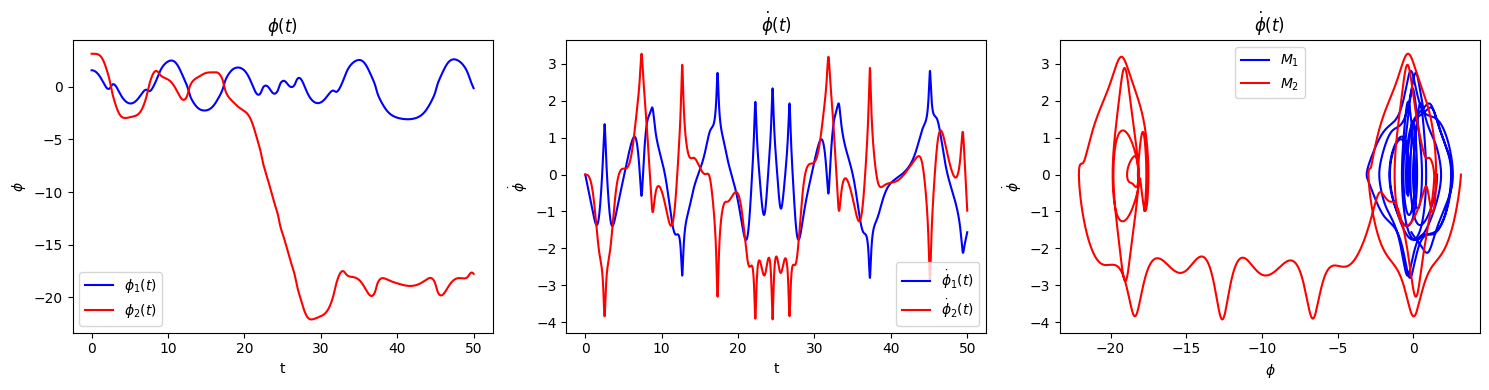

In [7]:
# start the plot!
fig = plt.figure(figsize=(15,4))
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax_a.plot(t_pts[start : stop], phi1[start : stop], color='blue',label=r'$\phi_1(t)$')    
ax_a.plot(t_pts[start : stop], phi2[start : stop], color='red',label=r'$\phi_2(t)$')    
ax_a.set_title(r'$\phi(t)$')
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$\phi$')
ax_a.legend()
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax_b.plot(t_pts[start : stop], phi1_dot[start : stop], color='blue', label=r'$\dot\phi_1(t)$')
ax_b.plot(t_pts[start : stop], phi2_dot[start : stop], color='red', label=r'$\dot\phi_2(t)$')    
ax_b.set_title(r'$\dot\phi(t)$')
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$\dot\phi$')
ax_b.legend()

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax_c.plot(phi1[start : stop], phi1_dot[start : stop], color='blue', label=r'$M_1$')    
ax_c.plot(phi2[start : stop], phi2_dot[start : stop], color='red', label=r'$M_2$')    
ax_c.set_title(r'$\dot\phi(t)$')
ax_c.set_xlabel(r'$\phi$')
ax_c.set_ylabel(r'$\dot\phi$')
ax_c.legend()

fig.tight_layout()
fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  